# To Do List

1. More analysis
2. Fix visuals - title, axes, color choices, legend
3. Background

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import os
os.chdir('C:\\Users\\nu\\Desktop\\Thinkful\\Bootcamp\\Capstone - Copy')
%matplotlib inline

In [2]:
# creates array of rows to skip in the dataset
skip = list(range(10))
skip.append(11)

# imports the files that we need
xl1 = pd.ExcelFile('Table_1.2_Primary_Energy_Production_by_Source.xlsx')
xl2 = pd.ExcelFile('Table_1.3_Primary_Energy_Consumption_by_Source.xlsx')
xl3 = pd.ExcelFile('Table_1.6_Cost_of_Fuels_to_End_Users_in_Real_(1982-1984)_Dollars.xlsx')
xl4 = pd.ExcelFile('Table_2.1_Energy_Consumption_by_Sector.xlsx')
annual_production = xl1.parse('Annual Data', skiprows = skip)
annual_consumption = xl2.parse('Annual Data', skiprows = skip)
fuel_cost = xl3.parse('Annual Data', skiprows = skip)
sectors = xl4.parse('Annual Data', skiprows = skip)

# Total Energy Production and Consumption

(1949, 2016)

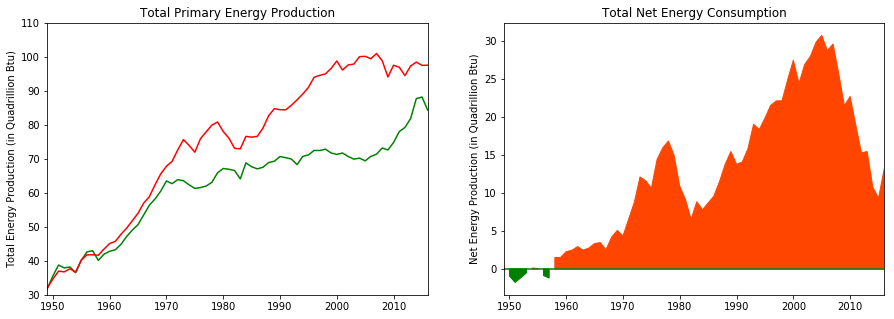

In [70]:
plt.rcParams['figure.figsize'] = [15,5]

# importing data from our sources
x = annual_production['Annual Total']
y1 = annual_production['Total Primary Energy Production']
y2 = annual_consumption['Total Primary Energy Consumption']
y3 = y2 -y1

# creating the three subplots
# try to make a fill between
plt.subplot(1,2,1)
plt.title('Total Primary Energy Production')
plt.axis([1949,2016, 30, 110])
plt.ylabel('Total Energy Production (in Quadrillion Btu)')
plt.plot(x, y1, color = 'green')
plt.plot(x, y2, color = 'red')

plt.subplot(1,2,2)
plt.title('Total Net Energy Consumption')
plt.axhline(0, color='green', linestyle = '-')
plt.ylabel('Net Energy Production (in Quadrillion Btu)')
plt.fill_between(x, 0, y3, where=y3 > 0, color = 'orangered')
plt.fill_between(x, 0, y3, where=y3 < 0, color = 'green')
plt.xlim((1949, 2016))

# Focus on Sustainable Production

(1949, 2016)

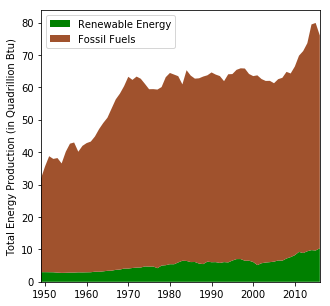

In [81]:
plt.rcParams['figure.figsize'] = [5,5]

x = annual_production['Annual Total']
y1 = annual_production['Total Renewable Energy Production']
y2 = annual_production['Total Fossil Fuels Production']

fig, ax = plt.subplots()
ax.stackplot(x, y1, y2, colors = ['green', 'sienna'], labels = ['Renewable Energy', 'Fossil Fuels'])
plt.legend(loc='upper left')
ax.set_ylabel('Total Energy Production (in Quadrillion Btu)')
plt.xlim((1949, 2016))

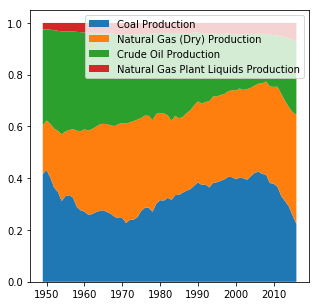

In [89]:
f = annual_production.columns[:]

fig, ax = plt.subplots()
ax.stackplot(x,
             annual_production[f[1]] / annual_production[f[5]],
             annual_production[f[2]] / annual_production[f[5]],
             annual_production[f[3]] / annual_production[f[5]],
             annual_production[f[4]] / annual_production[f[5]], 
             labels = (f[1],f[2],f[3],f[4]))
plt.legend(loc='upper right')
plt.show()

TypeError: 'NoneType' object is not subscriptable

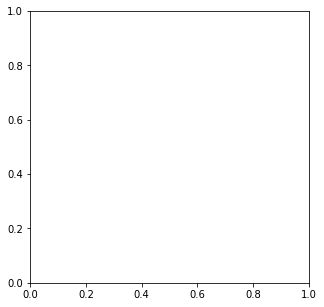

In [100]:
fig, ax = plt.subplots()
ax.stackplot(x,
             annual_production[f[5]] / annual_production[f[11]],
             annual_production[f[6]] / annual_production[f[11]],
             annual_production[f[7]] / annual_production[f[11]],
             annual_production[f[8]] / annual_production[f[11]],
             annual_production[f[9]] / annual_production[f[11]],
             annual_production[f[10]] / annual_production[f[11]], 
             labels = (f[5],f[6],f[7],f[8],f[9],f[10]))
plt.legend(loc='upper right')
plt.show()

Regression line: 0.000828563503025x + -1.55364774096
R-squared value: 0.853151552543


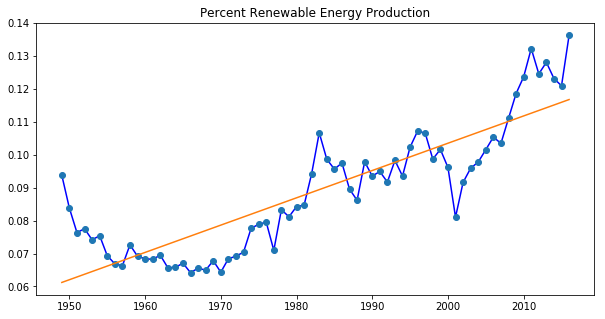

In [6]:
# creates a best-fit line
y3 = y1 / (y1 + y2)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y3)
line = slope*x+intercept

# creates the plot
plt.title('Percent Renewable Energy Production')
plt.plot(x, y3, color = 'blue')
plt.plot(x,y3,'o', x, line)

# return the linear regression equation and the r-squared value
print('Regression line: {}x + {}'.format(str(slope),str(intercept)))
print('R-squared value: {}'.format(str(r_value)))

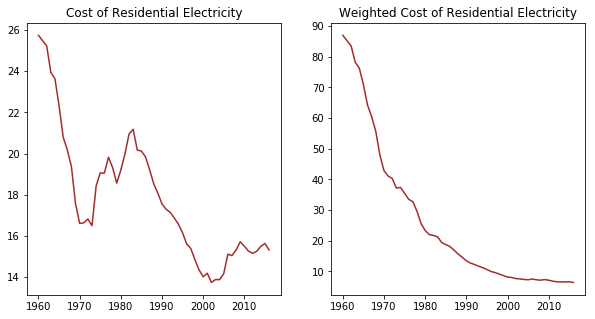

In [7]:
plt.rcParams['figure.figsize'] = [10,5]

fuel_cost = fuel_cost[:-1]
x = fuel_cost['Annual Average']
y1 = fuel_cost['Cost of Residential Electricity.1']
y2 = y1 / fuel_cost['Consumer Price Index (Urban)'] * 100

plt.subplot(1,2,1)
plt.title('Cost of Residential Electricity')
plt.plot(x, y1, color = 'brown')

plt.subplot(1,2,2)
plt.title('Weighted Cost of Residential Electricity')
plt.plot(x, y2, color = 'brown')